___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

## Complete the tasks in bold below!

**Task: Perform imports and load the dataset into a pandas DataFrame**
For this exercise you can load the dataset from `'../DATA/moviereviews.csv'`.

In [1]:
# CODE HERE

In [1]:
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [12]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**TASK: Check to see if there are any missing values in the dataframe.**

In [13]:
df.isna().sum()

label      0
review    35
dtype: int64

In [15]:
df.isna().sum()

label     0
review    0
dtype: int64

**TASK: Remove any reviews that are NaN**

In [14]:
df = df.dropna()

**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [23]:
df['review'].apply(lambda x: len(x.split())==0).sum()

27

In [29]:
df = df[df['review'].apply(lambda x : x.isspace()!=True)]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**TASK: Confirm the value counts per label:**

In [32]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

pos    969
neg    969
Name: label, dtype: int64

## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
tfidf = TfidfVectorizer()

In [35]:
X = df['review']
y = df['label']

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
count_vect = CountVectorizer(stop_words='english')

In [80]:
matrix = count_vect.fit_transform(X)
freqs = zip(count_vect.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
sorted(freqs, key=lambda x: -x[1])[0:20]

[('film', 9065),
 ('movie', 5520),
 ('like', 3529),
 ('just', 2753),
 ('good', 2310),
 ('time', 2302),
 ('story', 2107),
 ('character', 1963),
 ('characters', 1795),
 ('way', 1598),
 ('make', 1577),
 ('life', 1536),
 ('does', 1494),
 ('films', 1474),
 ('really', 1474),
 ('plot', 1465),
 ('little', 1447),
 ('people', 1397),
 ('bad', 1336),
 ('man', 1335)]

### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [66]:
X = df['review']
y = df['label']
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=101)

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [68]:
from sklearn.pipeline import Pipeline

In [70]:
from sklearn.naive_bayes import MultinomialNB

In [71]:
steps = [('tfidf',TfidfVectorizer()),('nbmulti', MultinomialNB())]

In [72]:
pipe = Pipeline(steps=steps)

In [73]:
pipe

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nbmulti', MultinomialNB())])

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [74]:
def report_model(model):
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    print(classification_report(y_test,y_pred))

In [76]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nbmulti', MultinomialNB())])

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

              precision    recall  f1-score   support

         neg       0.75      0.92      0.83       191
         pos       0.90      0.70      0.79       197

    accuracy                           0.81       388
   macro avg       0.83      0.81      0.81       388
weighted avg       0.83      0.81      0.81       388



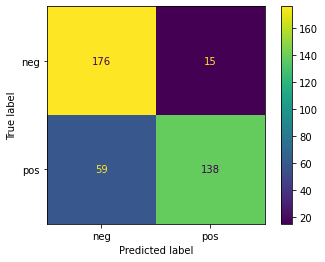

In [79]:
report_model(pipe)

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



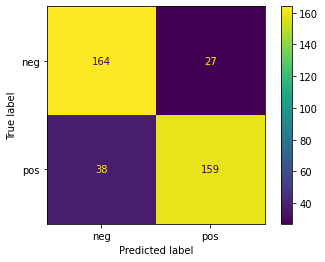

## Great job!